In [ ]:
# case study - build a hybrid model

In [ ]:
# part 1 -IDentify frauds with SOm

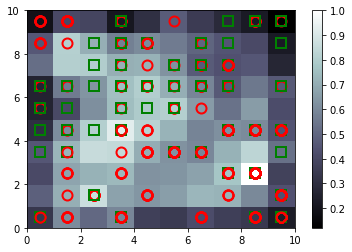

In [1]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [4]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,2)], mappings[(3,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [5]:
# PArt 2 - Unsupervised to supervised

In [7]:
customers = dataset.iloc[:,1:].values


In [8]:
# creating depe vaiable
is_fraud = np.zeros(len(dataset))

In [9]:
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)


In [11]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

# Part 3 - Making predictions and evaluating the model




Using TensorFlow backend.


Epoch 1/2
690/690 [==============================] - 1s - loss: 0.4130 - acc: 0.9435     
Epoch 2/2
690/690 [==============================] - 0s - loss: 0.1354 - acc: 0.9464     


NameError: name 'X_test' is not defined

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(customers)

In [16]:
y_pred = np.concatenate((dataset.iloc[:,0:1].values,y_pred),axis=1)

In [17]:
y_pred[:5]

array([[  1.57761560e+07,   3.59202065e-02],
       [  1.57395480e+07,   3.58763486e-01],
       [  1.56628540e+07,   8.10617954e-02],
       [  1.56876880e+07,   2.40371656e-02],
       [  1.57157500e+07,   1.32054128e-02]])

In [18]:
y_pred = y_pred[y_pred[:,1].argsort()]

In [19]:
y_pred[:5]

array([[  1.57997850e+07,   9.86560248e-04],
       [  1.56548590e+07,   1.19363575e-03],
       [  1.56214230e+07,   1.41390879e-03],
       [  1.57250280e+07,   1.52921397e-03],
       [  1.55946510e+07,   1.90234836e-03]])